In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Imports
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:

!pip install keras-tuner --upgrade
import keras_tuner as kt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#project_path = '/content/gdrive/MyDrive/Samhällsbyggnadsprogrammet/AH2179/Project/'
#df=pd.read_csv(project_path+'preprocessingV4.csv',sep=';') #Jennifers path
project_path = '/content/gdrive/MyDrive/Project Applied AI/Data/' #Linneas path

train_df=pd.read_csv(project_path+'Preprocessed Data/preprocessingV5.csv',sep=';')
train_df = train_df.dropna()

train_df[['FLOW_NEXT_15_SUM','SPEED_NEXT_15_AVG']].describe()




,FLOW_NEXT_15_SUM,SPEED_NEXT_15_AVG
count,476529.000000,476529.000000
mean,650.425336,19.813381
std,283.964541,2.048765
min,18.000000,2.102514
25%,423.000000,18.757950
50%,752.000000,20.001473
75%,883.000000,21.162601
max,1246.000000,25.009217


In [ ]:
eval_df=pd.read_csv(project_path+'Preprocessed Data/evalpreproV3.csv',sep=';')
eval_df = eval_df.dropna()
eval_df[['FLOW_NEXT_15_SUM','SPEED_NEXT_15_AVG']].describe()


,FLOW_NEXT_15_SUM,SPEED_NEXT_15_AVG
count,197436.000000,197436.000000
mean,661.870155,19.844674
std,287.845567,2.135399
min,33.000000,2.395607
25%,418.000000,18.948944
50%,770.000000,20.056423
75%,887.000000,21.083684
max,1254.000000,24.257949


In [ ]:
peak_eval_df=pd.read_csv(project_path+'Preprocessed Data/peakevalpreproV2.csv',sep=';')
peak_eval_df

,PORTAL,Date,Interval_1,FLOW_SUM,SPEED_WEIGHTED_AVG,FLOW_NEXT_15_SUM,FLOW_PREV_5_SUM,FLOW_PREV_15_SUM,FLOW_PREV_60_SUM,SPEED_NEXT_15_AVG,SPEED_PREV_5_AVG,SPEED_PREV_15_AVG,SPEED_PREV_60_AVG,IS_WEEKDAY,Interval_30
0,"E4S 55,620",2022-01-05,451,34.0,20.723529,535.0,183.0,528.0,2264.0,19.667645,19.924590,19.637822,19.783167,1,15
1,"E4S 55,620",2022-01-05,452,39.0,19.423846,542.0,194.0,535.0,2263.0,19.636033,19.861907,19.577645,19.760420,1,15
2,"E4S 55,620",2022-01-05,453,44.0,18.888636,532.0,195.0,550.0,2264.0,19.726297,19.685436,19.528818,19.752407,1,15
3,"E4S 55,620",2022-01-05,454,35.0,19.148571,535.0,193.0,541.0,2260.0,19.648710,19.564974,19.529261,19.732009,1,15
4,"E4S 55,620",2022-01-05,455,38.0,19.536842,524.0,190.0,549.0,2261.0,19.717195,19.504368,19.555647,19.708859,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41545,"E4S 58,140",2022-06-30,506,66.0,21.448182,919.0,330.0,946.0,3768.0,21.302590,21.522667,21.300666,21.365154,1,16
41546,"E4S 58,140",2022-06-30,507,50.0,20.661600,933.0,302.0,959.0,3760.0,21.347824,21.233344,21.265068,21.355133,1,16
41547,"E4S 58,140",2022-06-30,508,77.0,19.574805,921.0,317.0,970.0,3780.0,21.481379,21.013943,21.180227,21.318696,1,16
41548,"E4S 58,140",2022-06-30,509,49.0,22.113673,944.0,304.0,944.0,3757.0,21.406324,21.037599,21.176419,21.330000,1,16


In [ ]:
peak_eval_df[['FLOW_NEXT_15_SUM','SPEED_NEXT_15_AVG']].describe()

,FLOW_NEXT_15_SUM,SPEED_NEXT_15_AVG
count,41550.000000,41550.000000
mean,709.400193,19.562417
std,259.874066,2.096551
min,52.000000,2.522465
25%,545.000000,18.752712
50%,806.000000,19.687621
75%,905.000000,20.790880
max,1183.000000,23.672545


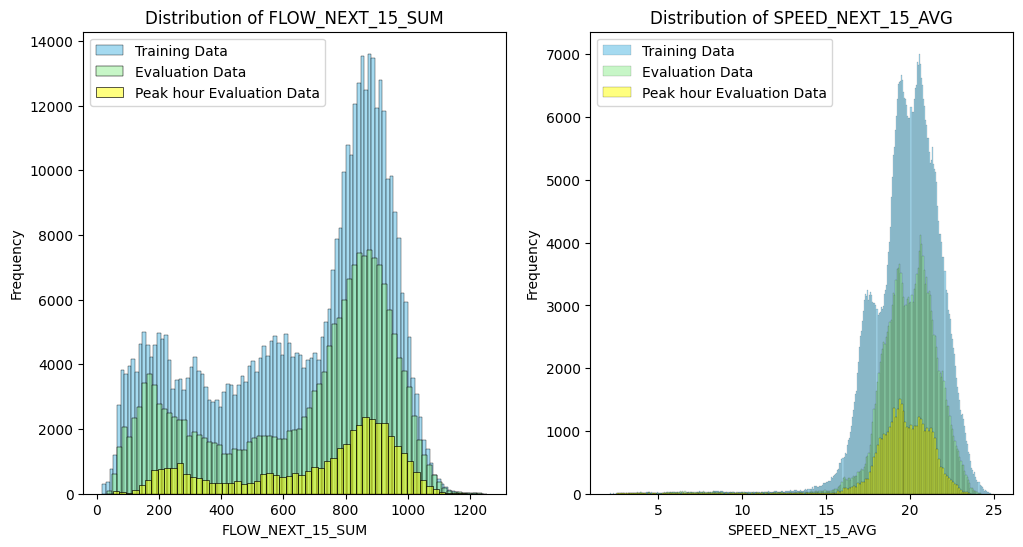

In [ ]:
### Histograms of dependent variables
plt.figure(figsize=(12, 6))

# Plotting FLOW_NEXT_15_SUM
plt.subplot(1, 2, 1)
sns.histplot(train_df['FLOW_NEXT_15_SUM'], color='skyblue',label='Training Data')
sns.histplot(eval_df['FLOW_NEXT_15_SUM'], color='lightgreen', label='Evaluation Data', alpha=0.5)
sns.histplot(peak_eval_df['FLOW_NEXT_15_SUM'], color='yellow', label='Peak hour Evaluation Data', alpha=0.5)
plt.title('Distribution of FLOW_NEXT_15_SUM')
plt.xlabel('FLOW_NEXT_15_SUM')
plt.ylabel('Frequency')
plt.legend()

# Plotting SPEED_NEXT_15_AVG
plt.subplot(1, 2, 2)
sns.histplot(train_df['SPEED_NEXT_15_AVG'], color='skyblue', label='Training Data')
sns.histplot(eval_df['SPEED_NEXT_15_AVG'], color='lightgreen', label='Evaluation Data', alpha=0.5)
sns.histplot(peak_eval_df['SPEED_NEXT_15_AVG'], color='yellow', label='Peak hour Evaluation Data', alpha=0.5)
plt.title('Distribution of SPEED_NEXT_15_AVG')
plt.xlabel('SPEED_NEXT_15_AVG')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [ ]:
# Check the correlation of the parameters
flow_corr = train_df.drop(['PORTAL', 'Date'], axis=1).corr()
flow_corr['FLOW_NEXT_15_SUM'].sort_values(ascending=False)

,FLOW_NEXT_15_SUM
FLOW_NEXT_15_SUM,1.000000
FLOW_PREV_15_SUM,0.965991
FLOW_PREV_5_SUM,0.965003
FLOW_PREV_60_SUM,0.942067
FLOW_SUM,0.917315
IS_WEEKDAY,0.637093
Interval_1,0.342705
Interval_30,0.340073
SPEED_WEIGHTED_AVG,-0.435655
SPEED_PREV_5_AVG,-0.464627


In [ ]:
speed_corr = train_df.drop(['PORTAL', 'Date'], axis=1).corr()
speed_corr['SPEED_NEXT_15_AVG'].sort_values(ascending=False)

,SPEED_NEXT_15_AVG
SPEED_NEXT_15_AVG,1.000000
SPEED_PREV_5_AVG,0.918064
SPEED_PREV_15_AVG,0.907124
SPEED_WEIGHTED_AVG,0.879604
SPEED_PREV_60_AVG,0.869657
IS_WEEKDAY,-0.279221
Interval_30,-0.284930
Interval_1,-0.286778
FLOW_SUM,-0.453465
FLOW_PREV_5_SUM,-0.481693
